In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
os.getcwd()

'/content/drive/My Drive/Capstone'

In [ ]:
os.chdir('/content/drive/MyDrive/Capstone')

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [ ]:
df = pd.read_csv('mbti_1.csv')
df.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [ ]:
df=df.dropna()
df.reset_index(inplace=True)

x=df['posts']

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

y = df.iloc[:,1].values
#y = ['INFJ', 'ENTP', 'INTP', 'INTJ', 'ENTJ', 'ENFJ', 'INFP', 'ENFP','ISFP', 'ISTP', 'ISFJ', 'ISTJ', 'ESTP', 'ESFP', 'ESTJ', 'ESFJ']
print(y)

['INFJ' 'ENTP' 'INTP' ... 'INTP' 'INFP' 'INFP']


In [ ]:
len(y)

8675

In [ ]:
y

array(['INFJ', 'ENTP', 'INTP', ..., 'INTP', 'INFP', 'INFP'], dtype=object)

In [ ]:

le=LabelEncoder()
y=le.fit_transform(y)

y=to_categorical(y)

In [ ]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding,LSTM,Dense,Dropout
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential

In [ ]:
voc_size = 50000
messages=x.copy()
messages

0       'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1       'I'm finding the lack of me in these posts ver...
2       'Good one  _____   https://www.youtube.com/wat...
3       'Dear INTP,   I enjoyed our conversation the o...
4       'You're fired.|||That's another silly misconce...
                              ...                        
8670    'https://www.youtube.com/watch?v=t8edHB_h908||...
8671    'So...if this thread already exists someplace ...
8672    'So many questions when i do these things.  I ...
8673    'I am very conflicted right now when it comes ...
8674    'It has been too long since I have been on per...
Name: posts, Length: 8675, dtype: object

In [ ]:
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
corpus=[]
for i in range (0,len(messages)):
    review = re.sub('[^a-zA-Z]','',messages[i])
    review=review.lower()
    review=review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english') ]
    review=''.join(review)
    corpus.append(review)

In [ ]:
oe=[one_hot(words,voc_size) for words in corpus ]

In [ ]:
sent_length=2500
embedded_docs = pad_sequences(oe,padding='pre',maxlen = sent_length)

In [ ]:
dimension=100
model = Sequential()
model.add(Embedding(voc_size,dimension,input_length = sent_length))
model.add(Dropout(0.25))
model.add(LSTM(100))
model.add(Dropout(0.25))
model.add(Dense(16,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer ='adam',metrics=['accuracy'])

In [ ]:
X=np.array(embedded_docs)

In [ ]:
df.type.value_counts()

INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
ENTP     685
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: type, dtype: int64

In [ ]:
import imblearn
# import library
from imblearn.under_sampling import RandomUnderSampler

from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42) # fit predictor and target variable
x_rus, y_rus = ros.fit_resample(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_rus, y_rus, test_size=0.2, random_state=42)

In [ ]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=8,batch_size=64)

Epoch 1/8
367/367 [==============================] - 77s 187ms/step - loss: 2.1810 - accuracy: 0.3413 - val_loss: 1.0155 - val_accuracy: 0.7503
Epoch 2/8
367/367 [==============================] - 68s 187ms/step - loss: 0.6311 - accuracy: 0.8303 - val_loss: 0.5164 - val_accuracy: 0.8441
Epoch 3/8
367/367 [==============================] - 68s 186ms/step - loss: 0.2455 - accuracy: 0.9526 - val_loss: 0.4954 - val_accuracy: 0.8463
Epoch 4/8
367/367 [==============================] - 69s 187ms/step - loss: 0.1518 - accuracy: 0.9577 - val_loss: 0.4921 - val_accuracy: 0.8537
Epoch 5/8
367/367 [==============================] - 68s 186ms/step - loss: 0.1295 - accuracy: 0.9583 - val_loss: 0.4973 - val_accuracy: 0.8475
Epoch 6/8
367/367 [==============================] - 68s 185ms/step - loss: 0.1240 - accuracy: 0.9576 - val_loss: 0.4949 - val_accuracy: 0.8436
Epoch 7/8
367/367 [==============================] - 68s 185ms/step - loss: 0.1203 - accuracy: 0.9567 - val_loss: 0.4909 - val_accuracy:

In [ ]:
model.save('Prediction.h5')

In [ ]:
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
from tensorflow.keras.preprocessing.text import one_hot
from nltk.stem.porter import PorterStemmer

def preprocess(tweet):
    
    ps=PorterStemmer()
    
    L=[]

    review = re.sub('[^a-zA-Z]','',tweet[0])
    review=review.lower()
    review=review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english') ]
    review=''.join(review)
    L.append(review)
    
    oe=[one_hot(words,voc_size) for words in L]
    
    sent_length=2500
    doc = pad_sequences(oe,padding='pre',maxlen = sent_length)
    
    return doc

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def MBTI(input):
    pred=preprocess(input)
    y_pred=model.predict(pred)
    y_pred=np.argmax(y_pred)
    return (y_pred)

In [ ]:
df = pd.read_csv('Final_articles_Train_Readability.csv', engine="python")

In [ ]:
df['MBTI'] = df['Cleaned_Article'].apply(MBTI)

In [ ]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Article URL,Headline,Article Text,Sub Domain,Domain,Author,Cleaned_Article,Cleaned_Headline,Cleaned_Author,Word_Count,Article_Size,Readability,F_Readability,length,MBTI
0,27244,27244,3459.0,https://www.entrepreneur.com/article/244420,\n\t\t\t\tNew iPhone Unveiled; Current Model G...,"\n\n\n\t\t\t\t\t\t\t\tJune\n\t\t\t\t\t\t\t\t8,...",Unavailable,Technology,Dennis Romero,"June 8, 2009 m...",New iPhone Unveiled; Current Model Goes for $99,Dennis Romero,290,Small,37.07,College,290,9
1,15490,15490,5565.0,https://www.entrepreneur.com/article/280563,\n\t\t\t\tA CFO's Perspective on Mastering Tim...,\n\n\n\t\t\t\t\t\t\t\tSeptember\n\t\t\t\t\t\t\...,Time Management Tips,Leadership,David Stack,"September 16, 2016 ...",A CFO's Perspective on Mastering Time When You...,David Stack,687,Medium,41.60,College,687,9
2,29156,29156,581.0,https://www.entrepreneur.com/article/316808,\n\t\t\t\tWhy Retailers are Using Square to Se...,\n\n\n\t\t\t\t\t\t\t\tDecember\n\t\t\t\t\t\t\t...,Point of Sale Systems,Technology,Entrepreneur Deals,"December 3, 2020 ...",Why Retailers are Using Square to Seamlessly S...,Entrepreneur Deals,586,Medium,47.12,College,586,9
3,21314,21314,2488.0,https://www.entrepreneur.com/article/319128,\n\t\t\t\t5 Last-Minute Sales Strategies to On...,\n\n\n\t\t\t\t\t\t\t\tJune\n\t\t\t\t\t\t\t\t13...,Clients,Strategy,Aimee Tariq,"June 13, 2019 6...",5 Last-Minute Sales Strategies to Onboard New ...,Aimee Tariq,1090,Large,54.56,Grade 10,1090,9
4,27522,27522,3911.0,https://www.entrepreneur.com/article/241432,\n\t\t\t\tSky's the Limit\n\t\t\t,\n\n\n\t\t\t\t\t\t\t\tApril\n\t\t\t\t\t\t\t\t1...,Technology,Technology,Geoff Williams,"April 1, 2007 6...",Sky's the Limit,Geoff Williams,1090,Large,60.38,Grade 8,1090,9


In [ ]:
df['MBTI'].value_counts()

9     26717
11     2158
1        17
8         5
Name: MBTI, dtype: int64

In [ ]:
df['MBTI'] = le.inverse_transform(df['MBTI'])

In [ ]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Article URL,Headline,Article Text,Sub Domain,Domain,Author,Cleaned_Article,Cleaned_Headline,Cleaned_Author,Word_Count,Article_Size,Readability,F_Readability,length,MBTI
0,27244,27244,3459.0,https://www.entrepreneur.com/article/244420,\n\t\t\t\tNew iPhone Unveiled; Current Model G...,"\n\n\n\t\t\t\t\t\t\t\tJune\n\t\t\t\t\t\t\t\t8,...",Unavailable,Technology,Dennis Romero,"June 8, 2009 m...",New iPhone Unveiled; Current Model Goes for $99,Dennis Romero,290,Small,37.07,College,290,INFP
1,15490,15490,5565.0,https://www.entrepreneur.com/article/280563,\n\t\t\t\tA CFO's Perspective on Mastering Tim...,\n\n\n\t\t\t\t\t\t\t\tSeptember\n\t\t\t\t\t\t\...,Time Management Tips,Leadership,David Stack,"September 16, 2016 ...",A CFO's Perspective on Mastering Time When You...,David Stack,687,Medium,41.60,College,687,INFP
2,29156,29156,581.0,https://www.entrepreneur.com/article/316808,\n\t\t\t\tWhy Retailers are Using Square to Se...,\n\n\n\t\t\t\t\t\t\t\tDecember\n\t\t\t\t\t\t\t...,Point of Sale Systems,Technology,Entrepreneur Deals,"December 3, 2020 ...",Why Retailers are Using Square to Seamlessly S...,Entrepreneur Deals,586,Medium,47.12,College,586,INFP
3,21314,21314,2488.0,https://www.entrepreneur.com/article/319128,\n\t\t\t\t5 Last-Minute Sales Strategies to On...,\n\n\n\t\t\t\t\t\t\t\tJune\n\t\t\t\t\t\t\t\t13...,Clients,Strategy,Aimee Tariq,"June 13, 2019 6...",5 Last-Minute Sales Strategies to Onboard New ...,Aimee Tariq,1090,Large,54.56,Grade 10,1090,INFP
4,27522,27522,3911.0,https://www.entrepreneur.com/article/241432,\n\t\t\t\tSky's the Limit\n\t\t\t,\n\n\n\t\t\t\t\t\t\t\tApril\n\t\t\t\t\t\t\t\t1...,Technology,Technology,Geoff Williams,"April 1, 2007 6...",Sky's the Limit,Geoff Williams,1090,Large,60.38,Grade 8,1090,INFP


In [ ]:
df['MBTI'].value_counts()

INFP    26717
INTP     2158
ENFP       17
INFJ        5
Name: MBTI, dtype: int64

In [ ]:
df.to_csv("Final_articles_Train_Readability_MBTIv1.csv",index=False)

In [ ]:
data_crosstab = pd.crosstab(df['Domain'],
                            df['MBTI'], 
                               margins = False)
print(data_crosstab)

MBTI        ENFP  INFJ  INFP  INTP
Domain                            
Finance        9     1  4159   280
Leadership     3     1  5500   417
Marketing      3     1  6592   530
Strategy       1     1  4483   426
Technology     1     1  5983   505


In [ ]:
data_crosstab

MBTI,ENFP,INFJ,INFP,INTP
Domain,,,,
Finance,9,1,4159,280
Leadership,3,1,5500,417
Marketing,3,1,6592,530
Strategy,1,1,4483,426
Technology,1,1,5983,505


In [ ]:
# Matplotlib is a data visualization library for 2D plots of arrays, built on NumPy arrays 
# and designed to work with the broader SciPy stack
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot
import seaborn as sns

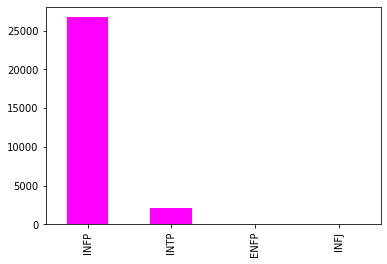

In [ ]:
df['MBTI'].value_counts().plot(kind='bar',color='magenta')

In [ ]:
sns.set(rc = {'figure.figsize':(5,5)})
sns.catplot(x="Domain", y="MBTI", hue="Article_Size", kind="swarm", data=df)

In [ ]:
sns.set(rc = {'figure.figsize':(5,5)})
sns.catplot(x="Domain", y="Word_Count", hue="MBTI", kind="swarm", data=df)